# **Naive Bayes Classifier**

### **Importing All Necessary Libraries**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

### **Data Framing**

In [15]:
df = pd.read_csv('diabetesdataset.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [16]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (995, 3)

glucose          0
bloodpressure    0
diabetes         0
dtype: int64 

          glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000


### **Feature Extraction**

In [17]:
df.features = df[["glucose","bloodpressure"]]
df.target = df.diabetes

C:\Users\Noor\AppData\Local\Temp\ipykernel_12436\2381566955.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.features = df[["glucose","bloodpressure"]]
C:\Users\Noor\AppData\Local\Temp\ipykernel_12436\2381566955.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = df.diabetes


### **Splitting the dataset**

In [18]:
feature_train, feature_test, target_train, target_test = train_test_split(df.features, df.target)

### **Model Training**

In [19]:
model = GaussianNB()
model = model.fit(feature_train, target_train)

### **Predict on the test data**

In [20]:
predictions = model.predict(feature_test)

In [21]:
model.predict([[30,65]])

C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### **Printing an Error Matrix and Accuracy Score**

In [22]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[118  11]
 [  6 114]]
0.9317269076305221


### **Plotting the confusion matrix**

<Axes: >

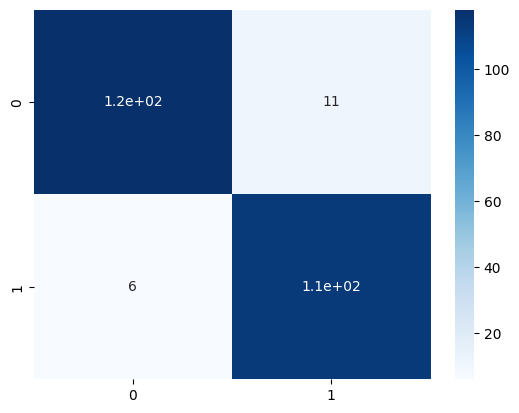

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')